# Project Komputasi Statistika II 
>Muhammad Burhan Aziz

>17/412744/PA/18063

#### 1.A

Diketahui fungsi densitas distribusi cauchy ($\theta$,1) adalah :
$$f(x)={1\over \pi(1+(x-\theta)^2)}$$

Maka dari itu didefinisikan fungsi likelihood nya adalah :
$$L(\theta)=\prod\limits_{i=1}^{20}{1\over \pi(1+(x_{i}-\theta)^2)} $$

Selanjutnya fungsi log-likelihood adalah logaritma dari fungsi likelihood. Maka diperoleh :
$$l(\theta)= -20log\pi-\sum\limits_{i=1}^{20}log(1+(x_{i}-\theta)^2)$$

MLE untuk $\theta$ akan dicari untuk nilai theta yang memaksimumkan dari fungsi log-likelihood. Dengan turunan dari fungsi log-likelihood = 0 , maka :
$$l^{'}(\theta)=\sum\limits_{i=1}^{20}{2(x_{i}-\theta^{*})\over(1+(x_{i}-\theta^{*})^2)}=0$$

Kita butuhkan turunan kedua dari fungsi log-likelihood untuk mengidentifikasi apakah $\theta$ yang dihasilkan benar benar memaksimalkan fungsi log-likelihood, maka :
$$l^{''}(\theta)={2(\theta^{*2}-2\theta^{*}x+x^2-1)\over(\theta^{*2}-2\theta^{*}x+x^2+1)^2}$$

Dengan metode newton raphson, dicari estimator untuk theta melalui persamaan iterasi sebagai berikut :
$$\theta^{t+1}=\theta^{t}-\frac{l^{'}(\theta^{t})}{l^{''}(\theta^{t})} $$
$$t=0,1,2,3 .....$$
Persamaan diatas akan berhenti ketika $|\theta^{t+1}-\theta^{t}|\leq \epsilon=0.00001$

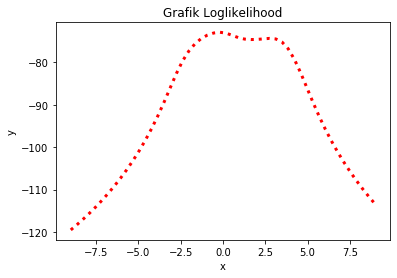

In [52]:
#Grafik log-likelihood Distribusi Cauchy
import matplotlib.pyplot as plt
from math import log, pi
import numpy as np

def llogcauchy(theta):
    y=0
    data=[1.77, -0.23, 2.76, 3.80, 3.47, 56.76, -1.34, 4.24, -2.44, 3.29, 3.71, -2.4, 4.53, -0.07, -1.05, -13.87, -2.53, -1.75, 0.27, 43.21]
    for i in data:
        y=y+log(1/(pi*(1+(i-theta)**2)))
    return(y)

x=np.linspace(-9,9)
y=list()
for i in x:
    y.append(llogcauchy(i))
plt.title("Grafik Loglikelihood")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y,color='red',linestyle='dotted',linewidth='3')
plt.show()

In [53]:
#Newton Raphson Cauchy
def ll(theta):
    st1=0
    data=[1.77, -0.23, 2.76, 3.80, 3.47, 56.76, -1.34, 4.24, -2.44, 3.29, 3.71, -2.4, 4.53, -0.07, -1.05, -13.87, -2.53, -1.75, 0.27, 43.21]
    for x in data:
        st1=st1+(2*(x-theta))/(1+(x-theta)**2)
    return(st1)

def ll1(theta):
    st2=0
    data=[1.77, -0.23, 2.76, 3.80, 3.47, 56.76, -1.34, 4.24, -2.44, 3.29, 3.71, -2.4, 4.53, -0.07, -1.05, -13.87, -2.53, -1.75, 0.27, 43.21]
    for x in data:
        st2=st2+2*(theta**2-2*theta*x+x**2-1)/(theta**2-2*theta*x+x**2+1)**2
    return(st2)

def NRcauchy(theta0) :
    print("Perhitungan MLE distribusi cauchy dengan metode Newton-Raphson\nNilai Awal :",theta0,"\n**********")
    tol=0.00001
    theta1=theta0-(ll(theta0)/ll1(theta0))
    itr=1
    print("--Iterasi-- : ",itr)
    print("Estimator untuk theta =",theta1)
    while abs(theta1-theta0)>tol:
        itr+=1
        theta0=theta1
        theta1=theta0-(ll(theta0)/ll1(theta0))
        print("--Iterasi-- : ",itr)
        print("Estimator untuk theta =",theta1)
        
    print("**********\nMLE untuk theta =",theta1)
    return(theta1)
NRcauchy(11)
NRcauchy(1)
NRcauchy(0)
NRcauchy(1.5)
NRcauchy(4)
NRcauchy(4.7)
NRcauchy(7)
NRcauchy(38)


Perhitungan MLE distribusi cauchy dengan metode Newton-Raphson
Nilai Awal : 11 
**********
--Iterasi-- :  1
Estimator untuk theta = 19.874581207099546
--Iterasi-- :  2
Estimator untuk theta = 36.297500596871885
--Iterasi-- :  3
Estimator untuk theta = 44.9263285705899
--Iterasi-- :  4
Estimator untuk theta = 50.281262406881574
--Iterasi-- :  5
Estimator untuk theta = 57.50307591570968
--Iterasi-- :  6
Estimator untuk theta = 52.5838712473207
--Iterasi-- :  7
Estimator untuk theta = 55.9772728140426
--Iterasi-- :  8
Estimator untuk theta = 56.58827945778119
--Iterasi-- :  9
Estimator untuk theta = 56.336466051686855
--Iterasi-- :  10
Estimator untuk theta = 56.27024745925714
--Iterasi-- :  11
Estimator untuk theta = 56.26366692554791
--Iterasi-- :  12
Estimator untuk theta = 56.26360212847791
--Iterasi-- :  13
Estimator untuk theta = 56.26360212221382
**********
MLE untuk theta = 56.26360212221382
Perhitungan MLE distribusi cauchy dengan metode Newton-Raphson
Nilai Awal : 1 
**********


42.79529149374498

Dengan nilai awal $\theta^0=8$ iterasi tidak konvergen. Berdasarkan dari beberapa nilai awal menghasilkan beragam nilai MLE. Hal ini teridentifikasi dari grafik fungsi log-likelihood pada rentang $-9\leq x \leq 9$ terdapat dua titik maksimum.

In [54]:
data=data=[1.77, -0.23, 2.76, 3.80, 3.47, 56.76, -1.34, 4.24, -2.44, 3.29, 3.71, -2.4, 4.53, -0.07, -1.05, -13.87, -2.53, -1.75, 0.27, 43.21]
vdata=np.array(data)
xbar= vdata.mean()
print('Diperoleh mean dari data yaitu = ',xbar)
NRcauchy(xbar)


Diperoleh mean dari data yaitu =  5.1065
Perhitungan MLE distribusi cauchy dengan metode Newton-Raphson
Nilai Awal : 5.1065 
**********
--Iterasi-- :  1
Estimator untuk theta = 17.263598071959382
--Iterasi-- :  2
Estimator untuk theta = 31.79792645554497
--Iterasi-- :  3
Estimator untuk theta = 47.98337521590913
--Iterasi-- :  4
Estimator untuk theta = 55.893325007627894
--Iterasi-- :  5
Estimator untuk theta = 57.22739769220878
--Iterasi-- :  6
Estimator untuk theta = 55.73228625625703
--Iterasi-- :  7
Estimator untuk theta = 51.98919284789423
--Iterasi-- :  8
Estimator untuk theta = 56.495761614592894
--Iterasi-- :  9
Estimator untuk theta = 56.31032053027123
--Iterasi-- :  10
Estimator untuk theta = 56.26650811212668
--Iterasi-- :  11
Estimator untuk theta = 56.26361462998514
--Iterasi-- :  12
Estimator untuk theta = 56.26360212244721
--Iterasi-- :  13
Estimator untuk theta = 56.26360212221382
**********
MLE untuk theta = 56.26360212221382


56.26360212221382

Diperoleh mean dari data sampel yaitu $=5.1065$. Ketika nilai tersebut digunakan sebagai $\theta^0$, maka nilai $\theta$ akan konvergen di 56.26360212221382 pada iterasi ke-13. Hal ini menunjukkan mean dari data sampel terlalu jauh untuk konvergen ke nilai $\theta$ yang memaksimalkan fungsi log-likelihood.

#### 1.B
Untuk mencari MLE dengan metode bisection, ditentukan nilai awal rentang yang akan diidentifikasi, katakanlah $(x_{0},x_{1})$. Pada rentang tersebut dibagi dua yakni diperoleh $(x_{0},x_{par})$ dan $(x_{par},x_{1})$. Dari dua rentang tersebut dipilih rentang yang terdapat nilai maksimum dari fungsi log-likelihood. Langkah tersebut diulangi hingga memperoleh limitasi nilai yang sampai pada fungsi maksimum dengan $\epsilon=0.00001$.
$$(x_{0},x_{1})=(x_{0},x_{par}) \\ l^{'}(x_{0}).l^{'}(x_{par}) \leq 0$$
$$(x_{0},x_{1})=(x_{par},x_{1}) \\ l^{'}(x_{par}).l^{'}(x_{1}) \leq 0$$


In [55]:
def biscauchy (theta0,theta1) :
    tol=0.00001
    theta2=(theta0+theta1)/2
    itr=1
    print('PERHITUNGAN NILAI MAKSIMUM DARI LOGLIKEHOOD DISTRIBUSI CAUCHY DENGAN METODE BISECTION\nBatas bawah awal :',theta0,'dan batas atas awal :',theta1,'\n**********')
    while abs(ll(theta2))>tol:
        print('---Iterasi--- :',itr)
        if ll(theta0)*ll(theta2)<0:
            theta1=theta2
            theta2=(theta0+theta1)/2
            print('Batas bawah baru :',theta0)
            print('Batas atas baru :',theta1)     
        elif ll(theta2)*ll(theta1)<0:
            theta0=theta2
            theta2=(theta0+theta1)/2
            print('Batas bawah baru :',theta0)
            print('Batas atas baru :',theta1)  
        itr+=1 
    print("MLE dari theta adalah ",theta2)
    return(theta2)

biscauchy(-1,1)

PERHITUNGAN NILAI MAKSIMUM DARI LOGLIKEHOOD DISTRIBUSI CAUCHY DENGAN METODE BISECTION
Batas bawah awal : -1 dan batas atas awal : 1 
**********
---Iterasi--- : 1
Batas bawah baru : -1
Batas atas baru : 0.0
---Iterasi--- : 2
Batas bawah baru : -0.5
Batas atas baru : 0.0
---Iterasi--- : 3
Batas bawah baru : -0.25
Batas atas baru : 0.0
---Iterasi--- : 4
Batas bawah baru : -0.25
Batas atas baru : -0.125
---Iterasi--- : 5
Batas bawah baru : -0.25
Batas atas baru : -0.1875
---Iterasi--- : 6
Batas bawah baru : -0.21875
Batas atas baru : -0.1875
---Iterasi--- : 7
Batas bawah baru : -0.203125
Batas atas baru : -0.1875
---Iterasi--- : 8
Batas bawah baru : -0.1953125
Batas atas baru : -0.1875
---Iterasi--- : 9
Batas bawah baru : -0.1953125
Batas atas baru : -0.19140625
---Iterasi--- : 10
Batas bawah baru : -0.193359375
Batas atas baru : -0.19140625
---Iterasi--- : 11
Batas bawah baru : -0.1923828125
Batas atas baru : -0.19140625
---Iterasi--- : 12
Batas bawah baru : -0.1923828125
Batas atas baru 

-0.192291259765625

Iterasi ini akan tidak berhenti apabila dipilih interval yang fungsinya monoton naik atau turun

#### 1.C
Metode fixed point iteration untuk mencari MLE dengan persamaan berikut :
$$\theta^{t+1}=\theta^{t}-l^{'}(\theta^{t})*\alpha $$
$$t=0,1,2,3 .....$$
Persamaan diatas akan berhenti ketika $|\theta^{t+1}-\theta^{t}|\leq \epsilon=0.00001$

In [56]:
def Fixitercauchy(theta0,scale) :
    print("Perhitungan MLE distribusi cauchy dengan metode Fixed Iteration\nNilai Awal :",theta0,"Scaling :",scale,"\n**********")
    tol=0.00001
    theta1=theta0-ll(theta0)*scale
    itr=1
    print("--Iterasi-- : ",itr)
    print("Estimator untuk theta =",theta1)
    while abs(theta1-theta0)>tol:
        itr+=1
        theta0=theta1
        theta1=theta0-ll(theta0)*scale
        print("--Iterasi-- : ",itr)
        print("Estimator untuk theta =",theta1)
        
    print('**********\nMLE untuk theta =',theta1)
    return(theta1)
Fixitercauchy(1,0.25)
Fixitercauchy(1,1)
Fixitercauchy(1,0.64)


Perhitungan MLE distribusi cauchy dengan metode Fixed Iteration
Nilai Awal : 1 Scaling : 0.25 
**********
--Iterasi-- :  1
Estimator untuk theta = 1.2771911972655672
--Iterasi-- :  2
Estimator untuk theta = 1.4235785529611529
--Iterasi-- :  3
Estimator untuk theta = 1.5090645317152274
--Iterasi-- :  4
Estimator untuk theta = 1.5644319756490712
--Iterasi-- :  5
Estimator untuk theta = 1.6026035984669125
--Iterasi-- :  6
Estimator untuk theta = 1.629940118636989
--Iterasi-- :  7
Estimator untuk theta = 1.6499985372416173
--Iterasi-- :  8
Estimator untuk theta = 1.6649569568361802
--Iterasi-- :  9
Estimator untuk theta = 1.6762374838483785
--Iterasi-- :  10
Estimator untuk theta = 1.6848120745447825
--Iterasi-- :  11
Estimator untuk theta = 1.691367282969923
--Iterasi-- :  12
Estimator untuk theta = 1.696399851827265
--Iterasi-- :  13
Estimator untuk theta = 1.7002755995396766
--Iterasi-- :  14
Estimator untuk theta = 1.7032674897205244
--Iterasi-- :  15
Estimator untuk theta = 1.70558121

1.7135895058913937

#### 1.D
Metode secant untuk mencari MLE dengan persamaan berikut :
$$\theta^{t+1}=\theta^{t}-(\theta^{t}-\theta^{t-1}).{l^{'}(\theta^{t})\over l^{'}(\theta^{t})-l^{'}(\theta^{t-1})}
$$t=0,1,2,3 .....$$
Persamaan diatas akan berhenti ketika $|\theta^{t+1}-\theta^{t}|\leq \epsilon=0.00001$

In [57]:
def secantcauchy(theta0,theta1):
    print('PERHITUNGAN NILAI MAKSIMUM DARI LOGLIKEHOOD DISTRIBUSI CAUCHY DENGAN METODE SECANT\nTheta 0 :',theta0,'dan Theta 1 :',theta1,'\n**********')
    tol=0.00001
    theta2=theta1-(theta1-theta0)*(ll(theta1))/(ll(theta1)-ll(theta0))
    itr=1
    print("--Iterasi-- : ",itr)
    print("Estimator untuk theta =",theta2)
    while abs(ll(theta2))>tol:
        theta0=theta1
        theta1=theta2
        theta2=theta1-(theta1-theta0)*(ll(theta1))/(ll(theta1)-ll(theta0))
        itr+=1
        print("--Iterasi-- : ",itr)
        print("Estimator untuk theta =",theta2)
    print('**********\nMLE untuk theta =',theta1)
    return(theta2)
secantcauchy(2,1)
    

PERHITUNGAN NILAI MAKSIMUM DARI LOGLIKEHOOD DISTRIBUSI CAUCHY DENGAN METODE SECANT
Theta 0 : 2 dan Theta 1 : 1 
**********
--Iterasi-- :  1
Estimator untuk theta = 1.837369487211753
--Iterasi-- :  2
Estimator untuk theta = 1.7678747247096136
--Iterasi-- :  3
Estimator untuk theta = 1.7087037090258281
--Iterasi-- :  4
Estimator untuk theta = 1.7138140313912473
--Iterasi-- :  5
Estimator untuk theta = 1.713595182265098
**********
MLE untuk theta = 1.7138140313912473


1.713595182265098

Untuk $(\theta^0,\theta^1)=(2,1)$ menghasilkan MLE konvergen di 1.7138140313912473 

Untuk $(\theta^0,\theta^1)=(3,3)$ tidak menghasilkan MLE karena pembagi dari fungsi iterasi tersebut bernilai $0$

#### 1E
Jika metode diatas diaplikasikan ke distribusi normal ~ N($\theta$,1) yang memiliki fungsi densitas :
$$f(x,\theta,1) = \frac{1}{\sqrt{2\pi}} e^{ (x\mu)^2 / 2^2}$$

Maka langkah tersebut akan ekuivalen dengan langkah yang sudah ada diatas 

In [58]:
#newton raphson
from math import e, sqrt
def dl(theta0):
    y=0
    normaldata=(1.4794551, -0.78815731, 0.12433022, -0.82175225, 0.39664719, -1.30682211, 0.33442186, -1.60553371, 0.62847309, -0.35568289, 1.58312934, -1.59777293, 0.86645424, -2.1153287, -0.9452946, -1.33754219, 0.8778056, 0.37589431, 0.58142405, 1.46907849)
    for i in normaldata:
        y=y+(i-theta0)
    return(y)

def ddl(theta0):
    y=0
    normaldata=(1.4794551, -0.78815731, 0.12433022, -0.82175225, 0.39664719, -1.30682211, 0.33442186, -1.60553371, 0.62847309, -0.35568289, 1.58312934, -1.59777293, 0.86645424, -2.1153287, -0.9452946, -1.33754219, 0.8778056, 0.37589431, 0.58142405, 1.46907849)
    for i in normaldata:
        y=-1
    return(y)

def NRnor(theta0) :
    print("Perhitungan MLE distribusi normal dengan metode Newton-Raphson\nNilai Awal :",theta0,"\n**********")
    tol=0.00001
    theta1=theta0-(dl(theta0)/ddl(theta0))
    itr=1
    print("--Iterasi-- : ",itr)
    print("Estimator untuk theta =",theta1)
    while abs(theta1-theta0)>tol:
        itr+=1
        theta0=theta1
        theta1=theta0-(dl(theta0)/ddl(theta0))
        print("--Iterasi-- : ",itr)
        print("Estimator untuk theta =",theta1)
        
    print("**********\nMLE untuk theta =",theta1)
    return(theta1)

NRnor(1.5)

Perhitungan MLE distribusi normal dengan metode Newton-Raphson
Nilai Awal : 1.5 
**********
--Iterasi-- :  1
Estimator untuk theta = -30.656773200000003
--Iterasi-- :  2
Estimator untuk theta = 580.3219176000001
--Iterasi-- :  3
Estimator untuk theta = -11028.273207600001
--Iterasi-- :  4
Estimator untuk theta = 209535.03417120007
--Iterasi-- :  5
Estimator untuk theta = -3981167.806026001
--Iterasi-- :  6
Estimator untuk theta = 75642186.15772083
--Iterasi-- :  7
Estimator untuk theta = -1437201539.1534693
--Iterasi-- :  8
Estimator untuk theta = 27306829241.759148
--Iterasi-- :  9
Estimator untuk theta = -518829755595.58057
--Iterasi-- :  10
Estimator untuk theta = 9857765356313.875
--Iterasi-- :  11
Estimator untuk theta = -187297541769965.78
--Iterasi-- :  12
Estimator untuk theta = 3558653293629348.0
--Iterasi-- :  13
Estimator untuk theta = -6.76144125789576e+16
--Iterasi-- :  14
Estimator untuk theta = 1.284673839000194e+18
--Iterasi-- :  15
Estimator untuk theta = -2.4408802941

nan

In [59]:
#bisection
def bisnor (theta0,theta1) :
    tol=0.00001
    theta2=(theta0+theta1)/2
    itr=1
    print('PERHITUNGAN NILAI MAKSIMUM DARI LOGLIKEHOOD DISTRIBUSI NORMAL DENGAN METODE BISECTION\nBatas bawah awal :',theta0,'dan batas atas awal :',theta1,'\n**********')
    while abs(dl(theta2))>tol:
        print('---Iterasi--- :',itr)
        if dl(theta0)*dl(theta2)<0:
            theta1=theta2
            theta2=(theta0+theta1)/2
            print('Batas bawah baru :',theta0)
            print('Batas atas baru :',theta1)     
        elif dl(theta2)*dl(theta1)<0:
            theta0=theta2
            theta2=(theta0+theta1)/2
            print('Batas bawah baru :',theta0)
            print('Batas atas baru :',theta1)  
        itr+=1 
    print("MLE dari theta adalah ",theta2)
    return(theta2)

bisnor(-1,1)

PERHITUNGAN NILAI MAKSIMUM DARI LOGLIKEHOOD DISTRIBUSI NORMAL DENGAN METODE BISECTION
Batas bawah awal : -1 dan batas atas awal : 1 
**********
---Iterasi--- : 1
Batas bawah baru : -1
Batas atas baru : 0.0
---Iterasi--- : 2
Batas bawah baru : -0.5
Batas atas baru : 0.0
---Iterasi--- : 3
Batas bawah baru : -0.25
Batas atas baru : 0.0
---Iterasi--- : 4
Batas bawah baru : -0.125
Batas atas baru : 0.0
---Iterasi--- : 5
Batas bawah baru : -0.125
Batas atas baru : -0.0625
---Iterasi--- : 6
Batas bawah baru : -0.125
Batas atas baru : -0.09375
---Iterasi--- : 7
Batas bawah baru : -0.109375
Batas atas baru : -0.09375
---Iterasi--- : 8
Batas bawah baru : -0.109375
Batas atas baru : -0.1015625
---Iterasi--- : 9
Batas bawah baru : -0.109375
Batas atas baru : -0.10546875
---Iterasi--- : 10
Batas bawah baru : -0.109375
Batas atas baru : -0.107421875
---Iterasi--- : 11
Batas bawah baru : -0.1083984375
Batas atas baru : -0.107421875
---Iterasi--- : 12
Batas bawah baru : -0.10791015625
Batas atas baru 

-0.10783863067626953

In [60]:
#fixed iteration
def Fixiternor(theta0,scale) :
    print("Perhitungan MLE distribusi normal dengan metode Fixed Iteration\nNilai Awal :",theta0,"Scaling :",scale,"\n**********")
    tol=0.00001
    theta1=theta0-dl(theta0)*scale
    itr=1
    print("--Iterasi-- : ",itr)
    print("Estimator untuk theta =",theta1)
    while abs(theta1-theta0)>tol:
        itr+=1
        theta0=theta1
        theta1=theta0-dl(theta0)*scale
        print("--Iterasi-- : ",itr)
        print("Estimator untuk theta =",theta1)
        
    print('**********\nMLE untuk theta =',theta1)
    return(theta1)
Fixiternor(1,0.25)

Perhitungan MLE distribusi normal dengan metode Fixed Iteration
Nilai Awal : 1 Scaling : 0.25 
**********
--Iterasi-- :  1
Estimator untuk theta = 6.539193300000001
--Iterasi-- :  2
Estimator untuk theta = 39.7743531
--Iterasi-- :  3
Estimator untuk theta = 239.1853119
--Iterasi-- :  4
Estimator untuk theta = 1435.6510647
--Iterasi-- :  5
Estimator untuk theta = 8614.4455815
--Iterasi-- :  6
Estimator untuk theta = 51687.212682300014
--Iterasi-- :  7
Estimator untuk theta = 310123.8152871001
--Iterasi-- :  8
Estimator untuk theta = 1860743.430915901
--Iterasi-- :  9
Estimator untuk theta = 11164461.124688705
--Iterasi-- :  10
Estimator untuk theta = 66986767.28732553
--Iterasi-- :  11
Estimator untuk theta = 401920604.2631465
--Iterasi-- :  12
Estimator untuk theta = 2411523626.1180725
--Iterasi-- :  13
Estimator untuk theta = 14469141757.24763
--Iterasi-- :  14
Estimator untuk theta = 86814850544.02496
--Iterasi-- :  15
Estimator untuk theta = 520889103264.689
--Iterasi-- :  16
Estima

inf

In [61]:
#secant method
def secantnor(theta0,theta1):
    print('PERHITUNGAN NILAI MAKSIMUM DARI LOGLIKEHOOD DISTRIBUSI NORMAL DENGAN METODE SECANT\nTheta 0 :',theta0,'dan Theta 1 :',theta1,'\n**********')
    tol=0.00001
    theta2=theta1-(theta1-theta0)*(dl(theta1))/(dl(theta1)-dl(theta0))
    itr=1
    print("--Iterasi-- : ",itr)
    print("Estimator untuk theta =",theta2)
    while abs(ll(theta2))>tol:
        theta0=theta1
        theta1=theta2
        theta2=theta1-(theta1-theta0)*(dl(theta1))/(dl(theta1)-dl(theta0))
        itr+=1
        print("--Iterasi-- : ",itr)
        print("Estimator untuk theta =",theta2)
    print('**********\nMLE untuk theta =',theta1)
    return(theta2)
secantnor(-2,2)

PERHITUNGAN NILAI MAKSIMUM DARI LOGLIKEHOOD DISTRIBUSI NORMAL DENGAN METODE SECANT
Theta 0 : -2 dan Theta 1 : 2 
**********
--Iterasi-- :  1
Estimator untuk theta = -0.10783865999999964
--Iterasi-- :  2
Estimator untuk theta = -0.10783866
--Iterasi-- :  3
Estimator untuk theta = -0.10783865999999998
--Iterasi-- :  4
Estimator untuk theta = -0.10783865999999999
--Iterasi-- :  5
Estimator untuk theta = -0.10783865999999998
--Iterasi-- :  6
Estimator untuk theta = -0.10783865999999998


ZeroDivisionError: float division by zero

#### 2.A
Diketahui fungsi densitas distribusi adalah :
$$f(x)={1-cos(x-\theta)\over 2\pi}$$

Maka dari itu didefinisikan fungsi likelihood nya adalah :
$$L(\theta)=\prod\limits_{i=1}^{20}{1-cos(x-\theta)\over 2\pi}$$

Selanjutnya fungsi log-likelihood adalah logaritma dari fungsi likelihood. Maka diperoleh :
$$l(\theta)= \sum\limits_{i=1}^{20}log({1-cos(x-\theta)\over 2\pi})$$

MLE untuk $\theta$ akan dicari untuk nilai theta yang memaksimumkan dari fungsi log-likelihood. Dengan turunan dari fungsi log-likelihood = 0 , maka :
$$l^{'}(\theta)=\sum\limits_{i=1}^{20}{sin(x_{i}-\theta) \over 1-cos(x_{i}-\theta)}=0$$

Kita butuhkan turunan kedua dari fungsi log-likelihood untuk mengidentifikasi apakah $\theta$ yang dihasilkan benar benar memaksimalkan fungsi log-likelihood, maka :
$$l^{''}(\theta)=\sum\limits_{i=1}^{20}{1 \over 1-cos(x_{i}-\theta)}$$

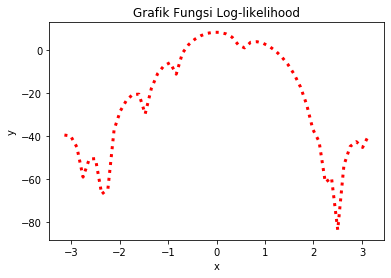

In [62]:
import matplotlib.pyplot as plt
from math import log,pi,cos
from numpy import linspace

def sumd(theta):
    sd=0
    data=[3.91,4.85,2.28,4.06,3.7,4.04,5.46,3.53,2.28,1.96,2.53,3.88,2.22,3.47,4.82,2.46,2.99,2.54,0.52,2.5]
    for i in data :
        sd=sd+log(1-cos(i-theta))/2*pi
    return (sd)

x=linspace(-pi,pi)
y=list()
for i in x:
    y.append(sumd(i))
plt.title('Grafik Fungsi Log-likelihood')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,color='red',linestyle='dotted',linewidth='3')
plt.show()

Terlihat dari grafik fungsi log-likelihood banyak titik maksimum lokal. diduga akan banyak nilai konvergen ekuivalen dengan banyak titik maksimum ketika diigunakan titik awal yang berbeda.

#### 2.B
Dengan metode momen, diperoleh estimator untuk $\theta$ dari momen tingkat 1 distribusi tersebut yaitu :
$$\theta^{*}=arcsin(mean-\pi)$$



In [63]:
import numpy as np
from math import asin,pi,sin,cos
data=[3.91,4.85,2.28,4.06,3.7,4.04,5.46,3.53,2.28,1.96,2.53,3.88,2.22,3.47,4.82,2.46,2.99,2.54,0.52,2.5]
def mlemomen(data) :
    mean=np.mean(data)
    theta=np.degrees(asin(mean-pi))
    print('Estimator untuk Theta menggunakan metode momen adalah =',theta)
    return(theta)
mlemomen(data)

Estimator untuk Theta menggunakan metode momen adalah = 3.348400084032623


3.348400084032623

#### 2.C
Dengan metode newton raphson, dicari estimator untuk theta melalui persamaan iterasi sebagai berikut :
$$\theta^{t+1}=\theta^{t}-\frac{l^{'}(\theta^{t})}{l^{''}(\theta^{t})} $$
$$t=0,1,2,3 .....$$
Persamaan diatas akan berhenti ketika $|\theta^{t+1}-\theta^{t}|\leq \epsilon=0.00001$

In [64]:
data=[3.91,4.85,2.28,4.06,3.7,4.04,5.46,3.53,2.28,1.96,2.53,3.88,2.22,3.47,4.82,2.46,2.99,2.54,0.52,2.5]
def sumd1(theta):
    sd1=0
    data=[3.91,4.85,2.28,4.06,3.7,4.04,5.46,3.53,2.28,1.96,2.53,3.88,2.22,3.47,4.82,2.46,2.99,2.54,0.52,2.5]
    for x in data:
        sd1=sd1+sin(x-theta)/(1-cos(x-theta))
    return(sd1)

def sumd2(theta):
    sd2=0
    data=[3.91,4.85,2.28,4.06,3.7,4.04,5.46,3.53,2.28,1.96,2.53,3.88,2.22,3.47,4.82,2.46,2.99,2.54,0.52,2.5]
    for x in data:
        sd2=sd2+1/(1-cos(x-theta))
    return(sd2)

def mlenr(theta0) :
    print("Perhitungan MLE dengan metode Newton-Raphson\nNilai Awal :",theta0,"\n**********")
    tol=0.00001
    theta1=theta0-(sumd1(theta0)/sumd2(theta0))
    itr=1
    print("--Iterasi-- : ",itr)
    print("Estimator untuk theta =",theta1)
    while abs(theta1-theta0)>tol:
        itr+=1
        theta0=theta1
        theta1=theta0-(sumd1(theta0)/sumd2(theta0))
        print("--Iterasi-- : ",itr)
        print("Estimator untuk theta =",theta1)
    print("**********\nMLE untuk theta =",theta1)
    return(theta1)

mlenr(mlemomen(data))
mlenr(-2.7)
mlenr(2.7)

Estimator untuk Theta menggunakan metode momen adalah = 3.348400084032623
Perhitungan MLE dengan metode Newton-Raphson
Nilai Awal : 3.348400084032623 
**********
--Iterasi-- :  1
Estimator untuk theta = 3.2472625162375026
--Iterasi-- :  2
Estimator untuk theta = 3.1918111768607385
--Iterasi-- :  3
Estimator untuk theta = 3.1900915101295357
--Iterasi-- :  4
Estimator untuk theta = 3.190093577264471
**********
MLE untuk theta = 3.190093577264471
Perhitungan MLE dengan metode Newton-Raphson
Nilai Awal : -2.7 
**********
--Iterasi-- :  1
Estimator untuk theta = -2.674113655831203
--Iterasi-- :  2
Estimator untuk theta = -2.66679392706757
--Iterasi-- :  3
Estimator untuk theta = -2.6666999271295535
--Iterasi-- :  4
Estimator untuk theta = -2.6666999261009474
**********
MLE untuk theta = -2.6666999261009474
Perhitungan MLE dengan metode Newton-Raphson
Nilai Awal : 2.7 
**********
--Iterasi-- :  1
Estimator untuk theta = 2.8257244845697205
--Iterasi-- :  2
Estimator untuk theta = 2.8775491083

2.8730945142450826

#### 2.D
dengan nilai awal interval $(-\pi,\pi)$ dipilih sebanyak 200 titik. Kemudian titik tersebut digunakan sebagai nilai awal dari MLE menggunakan metode newton raphson

In [65]:
def mlenrnew(theta0) :
    tol=0.00001
    theta1=theta0-(sumd1(theta0)/sumd2(theta0))
    while abs(theta1-theta0)>tol:
        theta0=theta1
        theta1=theta0-(sumd1(theta0)/sumd2(theta0))
    return(theta1)
x=np.linspace(-pi,pi,200)
listmle=list()
for i in x :
    listmle.append(round(mlenrnew(i),2))

listmle=np.unique(listmle)
grup1=list()
grup2=list()
grup3=list()
grup4=list()
grup5=list()
grup6=list()
grup7=list()
grup8=list()
grup9=list()
grup10=list()
grup11=list()
grup12=list()
grup13=list()
grup14=list()
grup15=list()
grup16=list()
grup17=list()
grup18=list()
grup19=list()

for i in x :
    if round(mlenrnew(i),2)==listmle[0] :
        grup1.append(i)
    elif round(mlenrnew(i),2)==listmle[1] :
        grup2.append(i)
    elif round(mlenrnew(i),2)==listmle[2] :
        grup3.append(i)
    elif round(mlenrnew(i),2)==listmle[3] :
        grup4.append(i)
    elif round(mlenrnew(i),2)==listmle[4] :
        grup5.append(i)
    elif round(mlenrnew(i),2)==listmle[5] :
        grup6.append(i)
    elif round(mlenrnew(i),2)==listmle[6] :
        grup7.append(i)
    elif round(mlenrnew(i),2)==listmle[7] :
        grup8.append(i)
    elif round(mlenrnew(i),2)==listmle[8] :
        grup9.append(i)
    elif round(mlenrnew(i),2)==listmle[9] :
        grup10.append(i)
    elif round(mlenrnew(i),2)==listmle[10] :
        grup11.append(i)
    elif round(mlenrnew(i),2)==listmle[11] :
        grup12.append(i)
    elif round(mlenrnew(i),2)==listmle[12] :
        grup13.append(i)
    elif round(mlenrnew(i),2)==listmle[13] :
        grup14.append(i)
    elif round(mlenrnew(i),2)==listmle[14] :
        grup15.append(i)
    elif round(mlenrnew(i),2)==listmle[15] :
        grup16.append(i)
    elif round(mlenrnew(i),2)==listmle[16] :
        grup17.append(i)
    elif round(mlenrnew(i),2)==listmle[17] :
        grup18.append(i)
    elif round(mlenrnew(i),2)==listmle[18] :
        grup19.append(i)

print("Kumpulan nilai awal yang menghasilkan mle =",listmle[0])
print(grup1)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[1])
print(grup2)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[2])
print(grup3)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[3])
print(grup4)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[4])
print(grup5)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[5])
print(grup6)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[6])
print(grup7)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[7])
print(grup8)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[8])
print(grup9)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[9])
print(grup10)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[10])
print(grup11)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[11])
print(grup12)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[12])
print(grup13)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[13])
print(grup14)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[14])
print(grup15)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[15])
print(grup16)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[16])
print(grup17)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[17])
print(grup18)
print("--------------------------------------------------------")
print("Kumpulan nilai awal yang menghasilkan mle =",listmle[18])
print(grup19)
print("--------------------------------------------------------")

Kumpulan nilai awal yang menghasilkan mle = -3.09
[-3.141592653589793, -3.110018858076328, -3.0784450625628628, -3.046871267049397, -3.015297471535932, -2.983723676022467, -2.9521498805090016, -2.9205760849955364, -2.889002289482071, -2.8574284939686057, -2.8258546984551405]
--------------------------------------------------------
Kumpulan nilai awal yang menghasilkan mle = -2.79
[-2.7942809029416753, -2.76270710742821]
--------------------------------------------------------
Kumpulan nilai awal yang menghasilkan mle = -2.67
[-2.7311333119147445, -2.6995595164012793, -2.667985720887814, -2.636411925374349, -2.604838129860884]
--------------------------------------------------------
Kumpulan nilai awal yang menghasilkan mle = -2.51
[-2.573264334347418, -2.5416905388339535, -2.510116743320488, -2.4785429478070227, -2.4469691522935575, -2.4153953567800923]
--------------------------------------------------------
Kumpulan nilai awal yang menghasilkan mle = -2.39
[-2.383821561266627]
------

#### 2.E
Hasil tersebut mengikuti bentuk grafik fungsi log-likelihood karena terdapat banyak titik maksimum lokal, maka banyaknya nilai mle yang dihasilkan akan mengikuti titik maksimum lokal grafik tersebut.
Maka dari itu dicari titik yang akan konvergen ke dua nilai mle $2.87$ dan $3.19$, adalah diantara titik terjauh yang menghasilkan mle $2.87$ yakni $x=2.983723676022467$ dan titik terdekat yang menghasilkan mle $3.19$ yakni $x=3.0152974715359324$ 
Dengan $\epsilon=0.000000000000000000000001$ harapannya akan sampai pada titik yang mendekati nilai x konvergen ke dua nilai mle

In [66]:
toleransi=0.000001
titik1=2.983723676022467
titik2=3.0152974715359324
titik1=round(titik1,6)
titik2=round(titik2,6)
while abs(titik1-titik2)>toleransi :
    titik1+=0.000001
    titik2-=0.000001
    titiknew=round(titik2,6)
print(titiknew)
        

2.999511


Dengan cara yang ekuivalen, kita akan mencari titik yang akan konvergen ke mle 2.24 dan 2.36

In [67]:
toleransi=0.000001
titik1=2.2575263792127664
titik2=2.289100174726231
titik1=round(titik1,6)
titik2=round(titik2,6)
while abs(titik1-titik2)>toleransi :
    titik1+=0.000001
    titik2-=0.000001
    titiknew=round(titik2,6)
print(titiknew)
        

2.273313
